In [1]:
from ligo import em_bright
from ligo.em_bright import em_bright
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import pandas as pd
import simulate_injections_rec_pairs

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import pandas as pd


class SimulateInjRecPairs_1:
    def __init__(self, N=100000, m_min=10, m_max=20):
        """
        METHOD:
        =======
        This method produces a random distribution of masses with a given range

        INPUT:
        ======
        N: Total number of samples
        m_min: Lower bound of the masses
        m_max: Upper bound of masses

        RETURNS:
      m ========
        Distribution of injected masses reshaped as (-1, 1)   
        """
        M_inj = m_min + (m_max - m_min) * np.random.random(N)
        self.M_inj = M_inj.reshape(-1, 1)
        return self.M_inj


    def fake_recovered_masses(self, offset, sigma):
        """
        METHOD:
        =======
        This method creates a fake distribution of recovered masses based on the injected masses
        """
        #now we will get a gaussian distribution of the M_rec with an offset to t
        M_rec = np.random.normal(self.M_inj + offset, sigma)
        #now we have both the mass injections and mass recovered in however the len the N sample is
        self.M_rec = M_rec.reshape(-1, 1)
        #reshaping is better for the machine learning model
        return self.M_rec
    
    def mass_predictor(self, test_size=0.2, random_state=42, test_result=True):
        X_train, self.X_test, y_train, y_test = train_test_split(self.M_inj, self.M_rec, 
                                                                 test_size=test_size,
                                                                 random_state=random_state)
        RandomForestRegressionModel = RandomForestRegressor()
        RandomForestRegressionModel.fit(X_train, y_train)
        if not test_result:
            return RandomForestRegressionModel
        self.y_pred = RandomForestRegressionModel.predict(self.X_test)
        return (self.X_test, self.y_pred, RandomForestRegressor)
    
    def plotter(self):
        plt.scatter(self.X_test, self.y_pred, s=2) 
        plt.xlabel('Test Masses')
        plt.ylabel('Pred Masses')
        plt.title("Predicting Injected Mass Values")
        plt.show()


In [4]:
SimObj = simulate_injections_rec_pairs.SimulateInjRecPairs_1()

In [5]:
SimObj.fake_recovered_masses(5, 1)

array([[26.12609611],
       [20.44034248],
       [22.10253435],
       ...,
       [17.04052609],
       [16.99899864],
       [22.79234983]])

In [8]:
SimObj.mass_predictor()

/Users/eltonago/EM_bright_clean/simulate_injections_rec_pairs.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


(array([[18.24298644],
        [13.71624729],
        [11.53679399],
        ...,
        [11.94593029],
        [10.82749287],
        [11.4504217 ]]),
 array([24.30222026, 19.07291269, 17.60483297, ..., 16.4760942 ,
        16.06505624, 16.45522812]),
 sklearn.ensemble._forest.RandomForestRegressor)

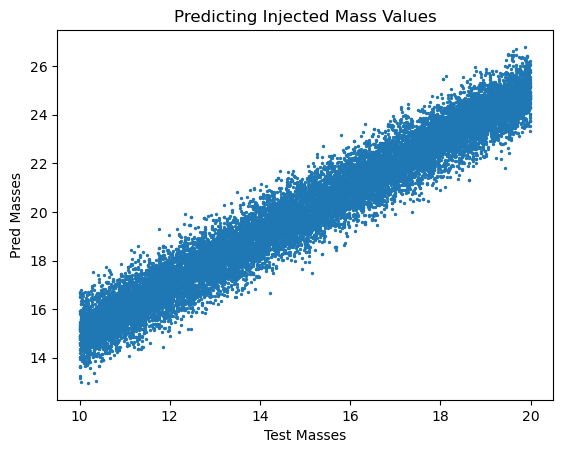

In [9]:
SimObj.plotter()